In [2]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")
library(cowplot)
library(gg.gap)
library(ggpol)
options(warn=-1)

## Figure 10B

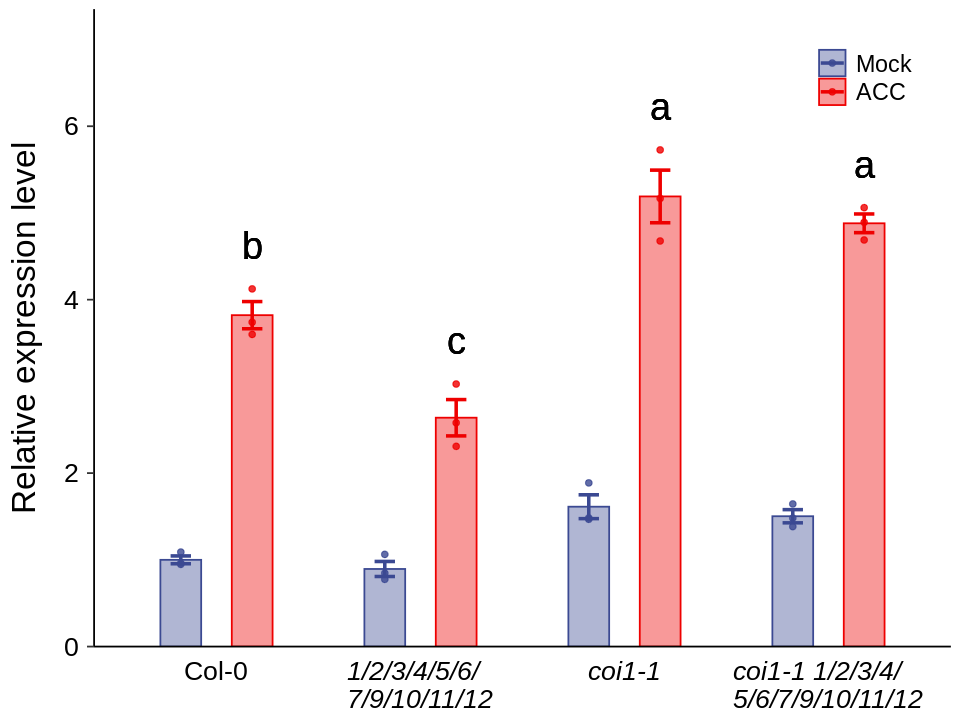

In [35]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/10B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:5)],1,max) + 0.5

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))

df_long$treatment <- factor(df_long$treatment, levels=c("Mock",
                                                        "ACC"))
# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black", 
#                                          hjust=1, vjust=1,
                                         margin = margin(t = 20, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.9,0.9),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}


# generate x-tick label vector
xtick_labs <- c("Col-0\n",
               expression(italic("1/2/3/4/5/6/\n7/9/10/11/12")),
               expression(italic("coi1-1\n")),
               expression(italic("coi1-1 1/2/3/4/\n5/6/7/9/10/11/12"))
               )

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

p <- ggplot(df_long, aes(genotype, value, fill=treatment, color=treatment))

B10 <- p + stat_summary(fun="mean",
                 geom="col",
                 position = position_dodge(0.7),
                 width = 0.4,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.2,
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.7)) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() + 
    scale_x_discrete(labels=xtick_labs) +
    scale_y_continuous(limits=c(0,7),expand = expansion(mult = c(0, 0.05))) +
    ylab("Relative expression level") +
    geom_text(aes(label= sig, y= max),
              size=8,
              color="black",
              position = position_dodge(0.7), 
              check_overlap=FALSE, 
              show.legend=FALSE)
B10

## Figure 10D

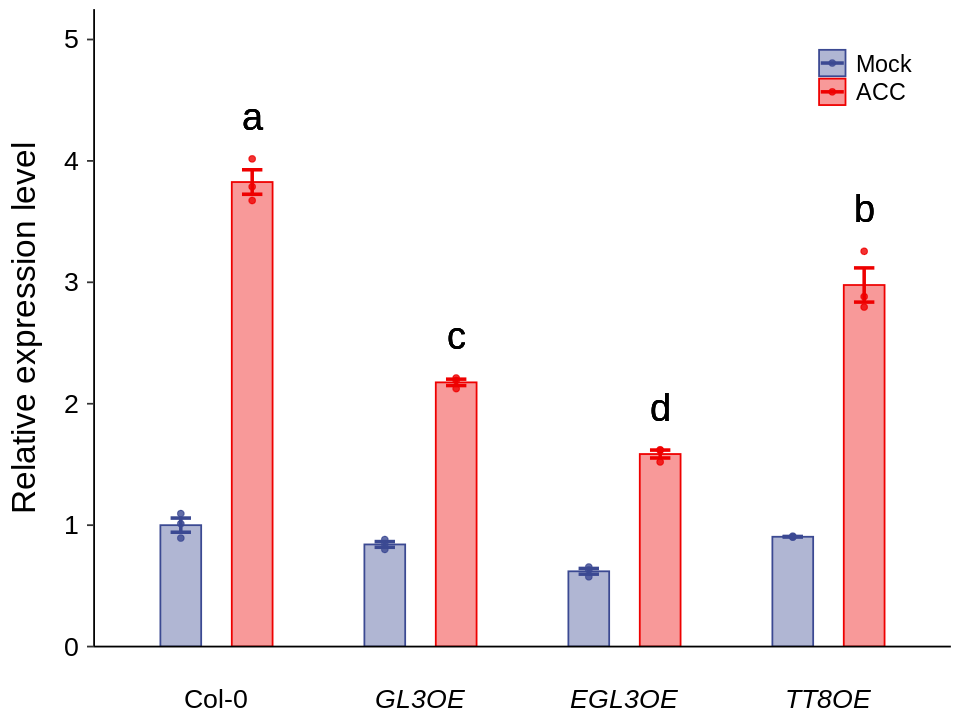

In [42]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/10D.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:5)],1,max) + 0.35

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "GL3OE",
                                                      "EGL3OE",
                                                      "TT8OE"))

df_long$treatment <- factor(df_long$treatment, levels=c("Mock",
                                                        "ACC"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black", 
#                                          hjust=1, vjust=1,
                                         margin = margin(t = 20, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.9,0.9),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}


# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("GL3OE")),
               expression(italic("EGL3OE")),
               expression(italic("TT8OE"))
               )

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

p <- ggplot(df_long, aes(genotype, value, fill=treatment, color=treatment))

D10 <- p + stat_summary(fun="mean",
                 geom="col",
                 position = position_dodge(0.7),
                 width = 0.4,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.2,
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.7)) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() + 
    scale_x_discrete(labels=xtick_labs) +
    scale_y_continuous(limits=c(0,5),expand = expansion(mult = c(0, 0.05))) +
    ylab("Relative expression level") +
    geom_text(aes(label= sig, y= max),
              size=8,
              color="black",
              position = position_dodge(0.7), 
              check_overlap=FALSE, 
              show.legend=FALSE)
D10

## Figure 10F

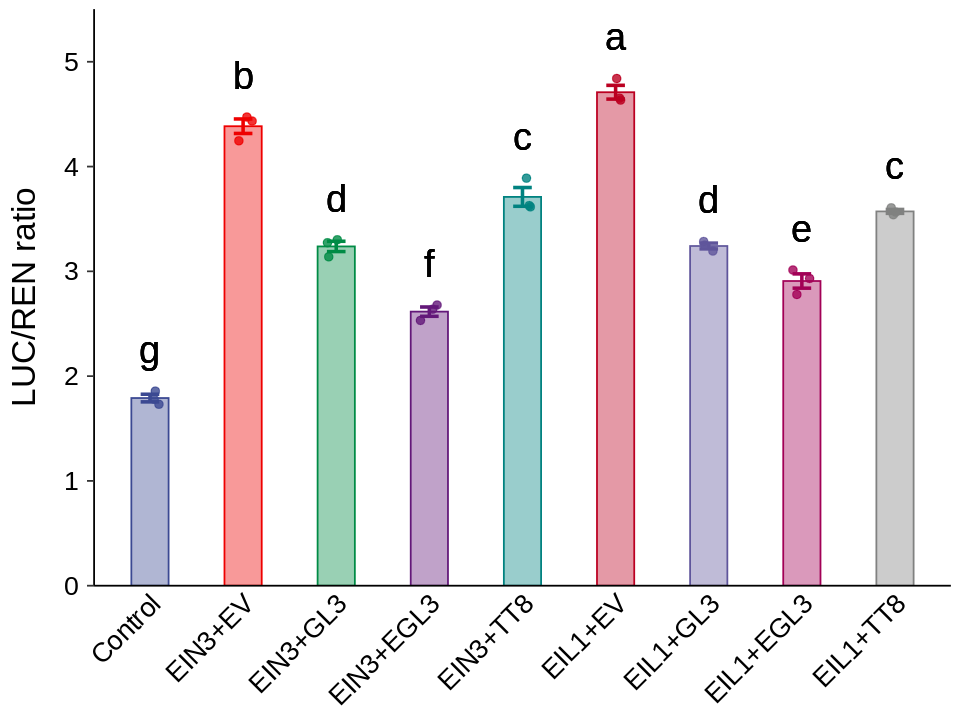

In [37]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/10F.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:4)],1,max) + 0.4

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Control",
                                                      "EIN3+EV",
                                                      "EIN3+GL3",
                                                      "EIN3+EGL3",
                                                      "EIN3+TT8",
                                                     "EIL1+EV",
                                                     "EIL1+GL3",
                                                     "EIL1+EGL3",
                                                     "EIL1+TT8"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))

F10 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.4,
                 position = position_dodge(1),
                 alpha=0.4,
                 show.legend=FALSE
                 ) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.2, 
                 size=1,
                 show.legend=FALSE
                 ) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1,
                show.legend=FALSE
               ) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
#     facet_wrap(~ treatment, 
#                nrow=1, 
#                scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=8,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) 
F10

## Combination

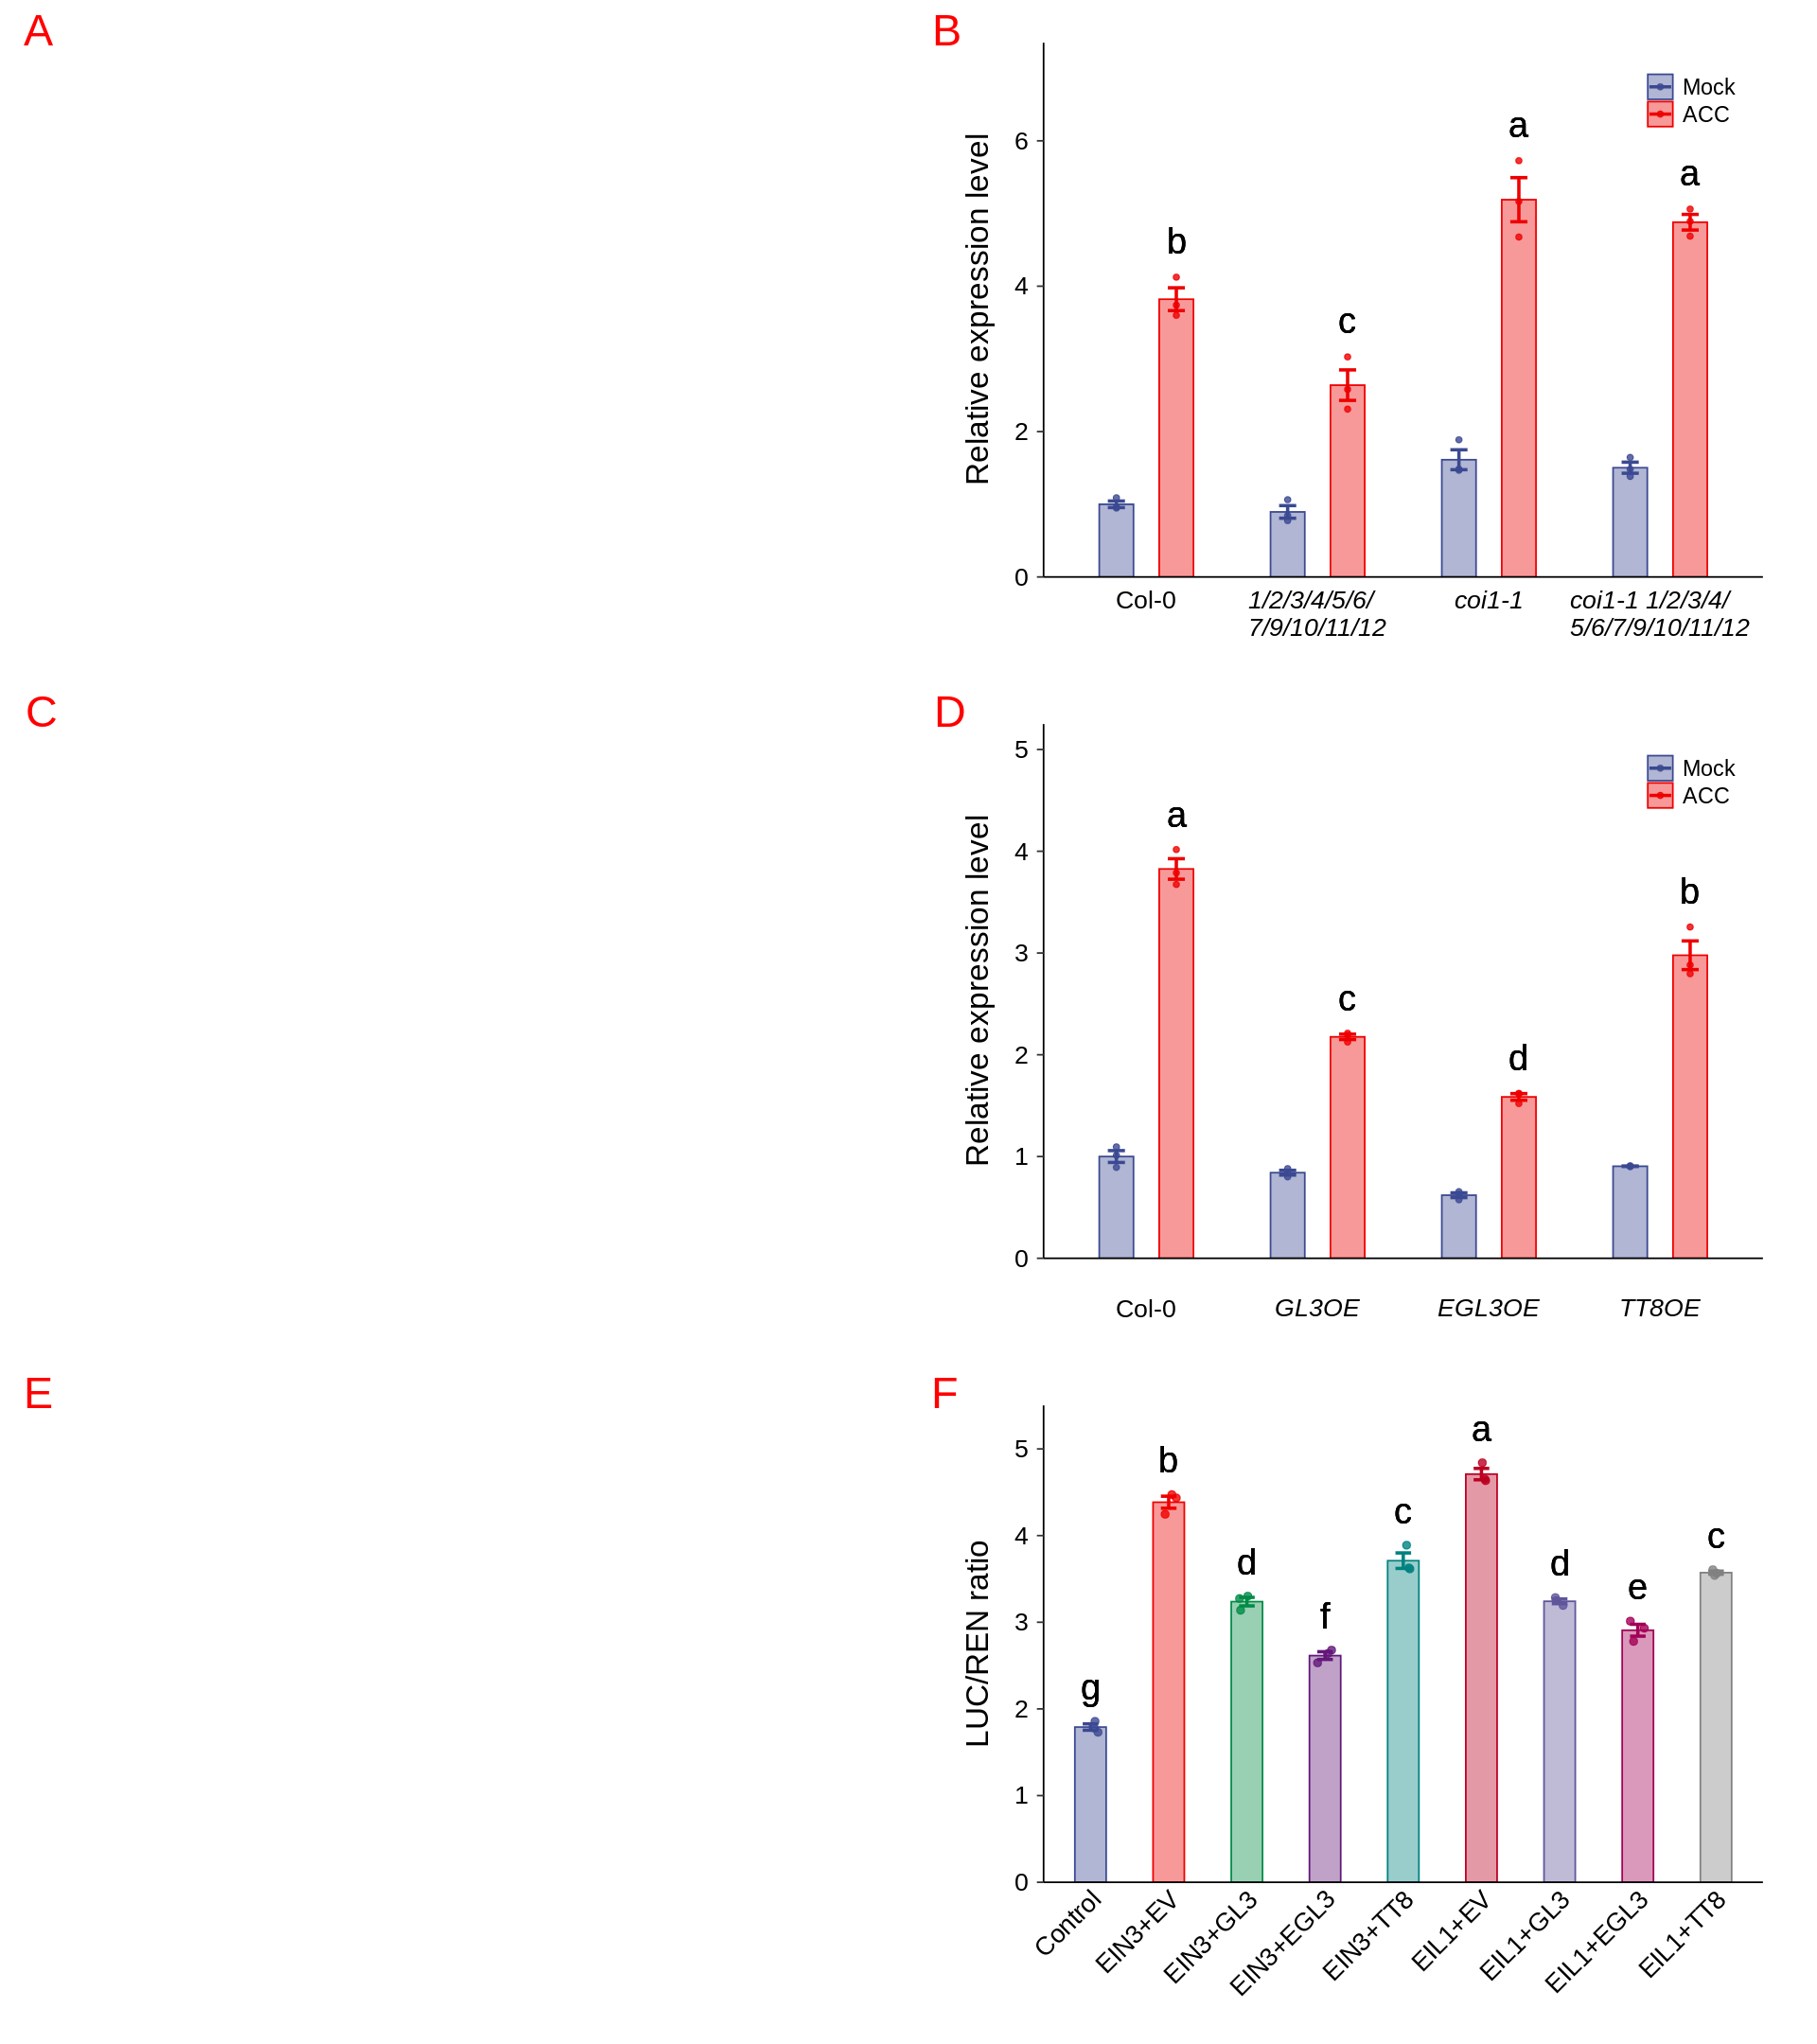

In [44]:
options(repr.plot.width = 16, repr.plot.height = 18)
fig10 <- plot_grid(NULL,B10,NULL,D10,NULL,F10,
          ncol=2,
          labels = c('A','B','C','D','E','F'),
          label_colour = 'red',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                  scale=0.9)
fig10
ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/10_fig_done/Figure10.png",
      fig10, height=18, width=16, dpi=300)